# Video Games Analysis
Antoni Lawrence

This dataset is from Kaggle, and shows the sales of a number of popular video games from down the years. For each game, we are provided with its Platform, Year, Publisher and its sales totals from 4 seperate regions, along with its overall Global sales. 


Here we are importing the relevant libaries and dataset.
From here, we can convert the cvs into a dataframe. We can inspect, look for any anomolies and clean the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
vd = pd.read_csv('videogame_sales.csv')
vd

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Below we are generating a statiscal snapshot of the dataframe.

In [3]:
vd.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Below is a information needed to begin cleaning the dataframe. Note that the format of the year needed to be changed from a float to the date. And any
rows with null values have been dropped to keep the data consistent.

In [60]:
vd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16291 non-null  int64         
 1   Name          16291 non-null  object        
 2   Platform      16291 non-null  object        
 3   Year          16291 non-null  datetime64[ns]
 4   Genre         16291 non-null  object        
 5   Publisher     16291 non-null  object        
 6   NA_Sales      16291 non-null  float64       
 7   EU_Sales      16291 non-null  float64       
 8   JP_Sales      16291 non-null  float64       
 9   Other_Sales   16291 non-null  float64       
 10  Global_Sales  16291 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


In [6]:
vd.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Length: 16598, dtype: bool

In [7]:
vd.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
vd=vd.dropna()
vd

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [9]:
vd.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [11]:
vd.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [13]:
vd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [14]:
vd['Year']=pd.to_datetime(vd['Year'])
vd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16291 non-null  int64         
 1   Name          16291 non-null  object        
 2   Platform      16291 non-null  object        
 3   Year          16291 non-null  datetime64[ns]
 4   Genre         16291 non-null  object        
 5   Publisher     16291 non-null  object        
 6   NA_Sales      16291 non-null  float64       
 7   EU_Sales      16291 non-null  float64       
 8   JP_Sales      16291 non-null  float64       
 9   Other_Sales   16291 non-null  float64       
 10  Global_Sales  16291 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


C:\Users\Antoni\AppData\Local\Temp\ipykernel_9020\676168611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vd['Year']=pd.to_datetime(vd['Year'])


### First analysis visualisation

Below you can see the most represented video games by genre in the dataset. Action is the genre with the highest level of representation with over 3000 entries.

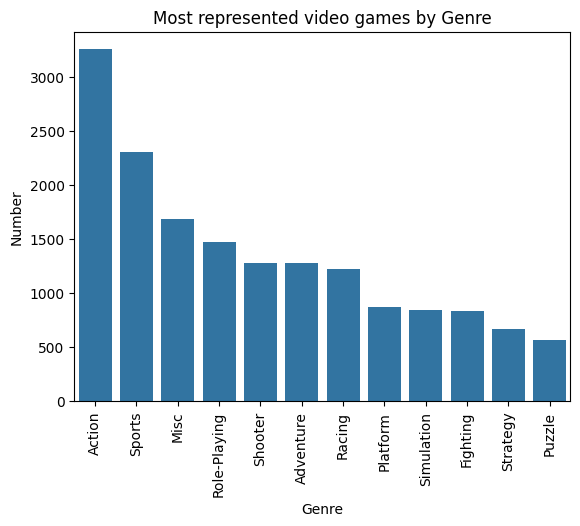

In [32]:
sns.countplot(x='Genre',data=vd,order=vd['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel('Number')
plt.title('Most represented video games by Genre');

### Second analysis visualisation

The below groups each platform and shows us their indiviual global sales performance.

In [41]:
average_sales_per_console = vd.groupby('Platform')['Global_Sales'].mean().reset_index()

C:\Users\Antoni\AppData\Local\Temp\ipykernel_9020\2540411003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_sales_per_console, x='Platform', y='Global_Sales', palette='viridis')


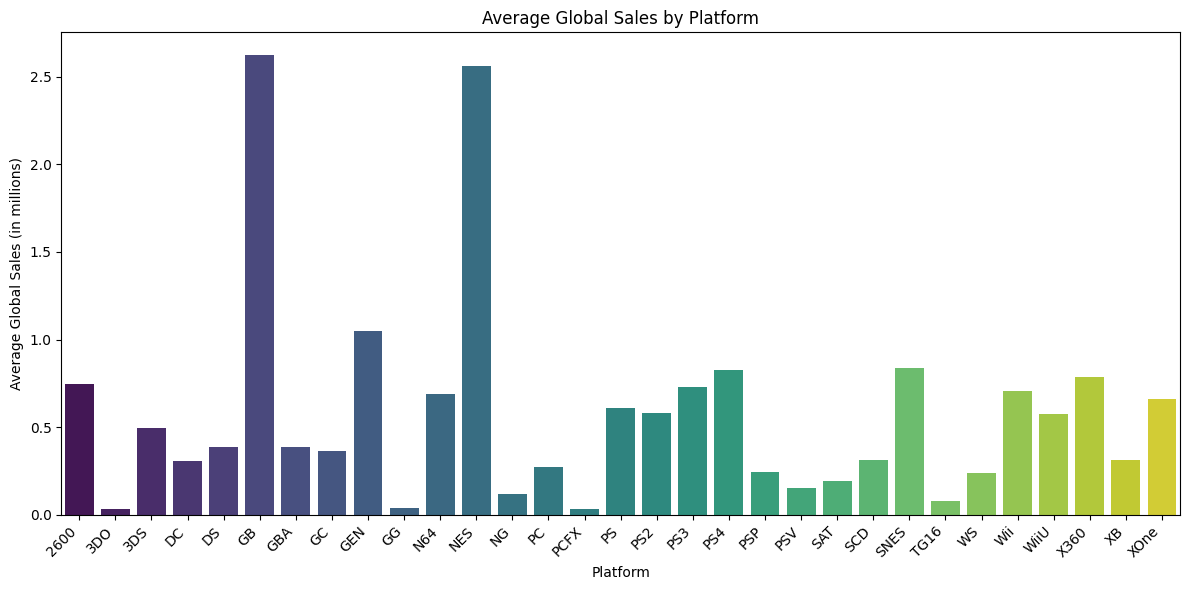

In [58]:
plt.figure(figsize=(12, 6))
sns.barplot(data=average_sales_per_console, x='Platform', y='Global_Sales', palette='viridis')
plt.title('Average Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Global Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Third analysis visualisation

The below simply shows us the total number of sales per region with North America being the most popular by a far margin.

C:\Users\Antoni\AppData\Local\Temp\ipykernel_9020\1235203346.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_sales.index, y=area_sales.values, palette='magma_r')


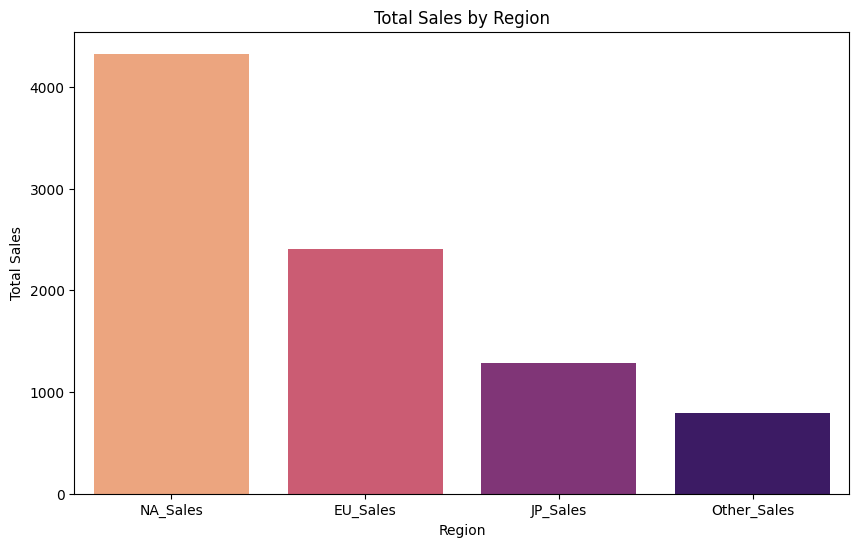

In [38]:
area_sales = vd[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
area_sales = area_sales.sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=area_sales.index, y=area_sales.values, palette='magma_r')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

### Fourth analysis visualisation

Below we are showing a visualisation of the top 2 sales regions, North America and Europe, and how North America eventually breaks away in terms of its sales.

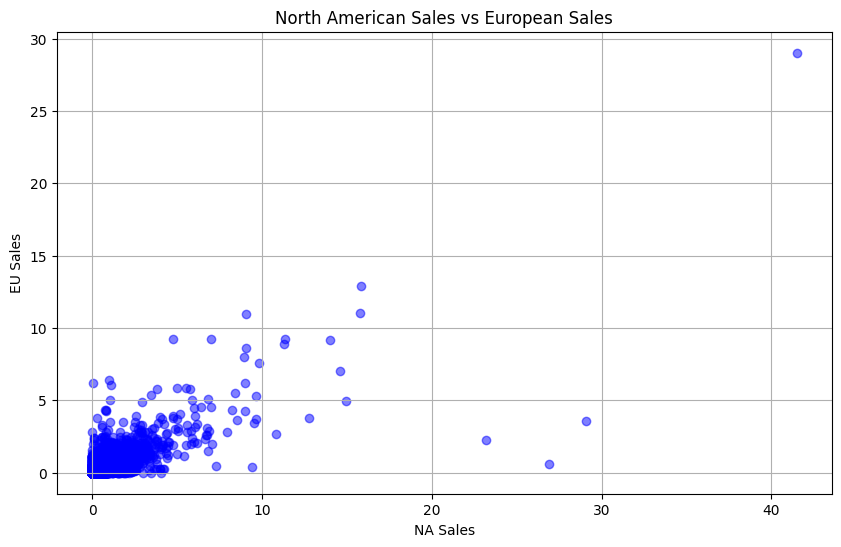

In [57]:
plt.figure(figsize=(10, 6))

plt.scatter(vd['NA_Sales'], vd['EU_Sales'], color='blue', alpha=0.5)
plt.title('North American Sales vs European Sales')
plt.xlabel('NA Sales')
plt.ylabel('EU Sales')
plt.grid(True) 
plt.show()

### Conclusion

We can conclude that North American has dominated the number of video games sold by a large amount. There doesn't seem to be a difference in popularity of video games by region, simply a difference in the numbers sold. We can probably estimate that this is because of the greater spending power of the American market, and the well known tendency for American children to play outside less.